# Telecom Churn Case Study

### Business Problem
- In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

### Customer behaviour during churn
- In churn prediction, we assume that there are three phases of customer lifecycle :

1. The ‘good’ phase: In this phase, the customer is happy with the service and behaves as usual.

2. The ‘action’ phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

3. The ‘churn’ phase: In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase

In [1]:
# import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Display max number of rows and columns is 500 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [3]:
# Load the data
tel_churn_data = pd.read_csv('telecom_churn_data.csv')

In [4]:
# read the data
tel_churn_data.head(15)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,

In [5]:
tel_churn_data.describe([0.25,0.5,0.75,0.90,0.95])

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [6]:
tel_churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


- Dataset has 99999 rows and 226 columns

In [7]:
# List of all columns

all_cols = tel_churn_data.columns.tolist()

### High Value Customers

- High-value customers are those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase)

In [8]:
# deriving the features to extract high value customers
# we have two columns available to find this out the total amount spent by customers on data recharge
# first column is av_rech_amt_data_x (x represents month here, would be either 6 or 7 or 8 or 9)
# second column is total_rech_data_x (x represnts month here, would be either 6 or 7 or 8 or 9)
# calculating the amount

tel_churn_data['total_rech_data_amt_6'] = tel_churn_data['av_rech_amt_data_6'] * tel_churn_data['total_rech_data_6']
tel_churn_data['total_rech_data_amt_7'] = tel_churn_data['av_rech_amt_data_7'] * tel_churn_data['total_rech_data_7']
tel_churn_data['total_rech_data_amt_8'] = tel_churn_data['av_rech_amt_data_8'] * tel_churn_data['total_rech_data_8']
tel_churn_data['total_rech_data_amt_9'] = tel_churn_data['av_rech_amt_data_9'] * tel_churn_data['total_rech_data_9']


In [9]:
# Dropping the columns av_rech_amt_data_x,total_rech_data_x (x = 6/7/8/9)
tel_churn_data.drop(['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9',
'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9'],axis = 1,inplace = True)

In [10]:
# Finding the average recharge done in the first two months(june & july) - the good phase
# total amount spend would be the sum of total data recharge done & total call/sms recharges
tel_data_temp = (tel_churn_data['total_rech_amt_6'].fillna(0) 
+ tel_churn_data['total_rech_amt_7'].fillna(0) 
+ tel_churn_data['total_rech_data_amt_6'].fillna(0) 
+ tel_churn_data['total_rech_data_amt_7'].fillna(0))/2

In [11]:
# Taking 70 percentile of the calculated average amount
tel_data_70 = np.percentile(tel_data_temp, 70.0)
print("70 percentile is : ",tel_data_70 )

# filtering the given data set based on 70th percentile
data_tel_hvc = tel_churn_data[tel_data_temp >= tel_data_70]

print("Dimensions of the filtered dataset:",data_tel_hvc.shape)

70 percentile is :  478.0
Dimensions of the filtered dataset: (30001, 222)


- Tagging churn : Those who have not made any calls AND have not used mobile internet even once in the churn phase
.The attributes use to tag churners are:
- total_ic_mou_9
- total_og_mou_9
- vol_2g_mb_9
- vol_3g_mb_9

In [12]:
data_tel_hvc['churn'] = np.where(data_tel_hvc[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1)==0 ,1,0)
data_tel_hvc.head()


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,total_rech_data_amt_9,churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014

In [13]:
data_tel_hvc.churn.value_counts(normalize = True)

0    0.918636
1    0.081364
Name: churn, dtype: float64

In [14]:
# Dropping month 9 columns
mnth9_columns = [col for col in all_cols if '9' in col]

data_tel_hvc.drop( [ col for col in mnth9_columns if col not in ['total_rech_data_9', 'av_rech_amt_data_9'] ],
                axis=1, inplace=True)
data_tel_hvc.shape

(30001, 171)

In [15]:
# dropping the unique value columns as they dont provide any information
for i in data_tel_hvc.columns:
    if data_tel_hvc[i].nunique() == 1:
        data_tel_hvc.drop(i,axis=1,inplace = True)

In [16]:
data_tel_hvc.shape

(30001, 158)

## Data Cleaning and EDA

In [17]:
# Checking for missing values
missing_val = round(data_tel_hvc.isna().sum() / len(data_tel_hvc) * 100,2).sort_values(ascending=False)
missing_val

total_rech_data_amt_9       49.27
arpu_2g_8                   46.83
fb_user_8                   46.83
count_rech_2g_8             46.83
date_of_last_rech_data_8    46.83
count_rech_3g_8             46.83
night_pck_user_8            46.83
arpu_3g_8                   46.83
max_rech_data_8             46.83
total_rech_data_amt_8       46.83
count_rech_2g_6             44.15
arpu_3g_6                   44.15
count_rech_3g_6             44.15
arpu_2g_6                   44.15
date_of_last_rech_data_6    44.15
max_rech_data_6             44.15
night_pck_user_6            44.15
total_rech_data_amt_6       44.15
fb_user_6                   44.15
total_rech_data_amt_7       43.15
max_rech_data_7             43.15
arpu_3g_7                   43.15
fb_user_7                   43.15
count_rech_2g_7             43.15
arpu_2g_7                   43.15
date_of_last_rech_data_7    43.15
count_rech_3g_7             43.15
night_pck_user_7            43.15
spl_og_mou_8                 3.91
og_others_8   

In [18]:
#List of columns which have missing values greater than 40% 
miss_value_40 = missing_val[missing_val>40].index.tolist()
miss_value_40

['total_rech_data_amt_9',
 'arpu_2g_8',
 'fb_user_8',
 'count_rech_2g_8',
 'date_of_last_rech_data_8',
 'count_rech_3g_8',
 'night_pck_user_8',
 'arpu_3g_8',
 'max_rech_data_8',
 'total_rech_data_amt_8',
 'count_rech_2g_6',
 'arpu_3g_6',
 'count_rech_3g_6',
 'arpu_2g_6',
 'date_of_last_rech_data_6',
 'max_rech_data_6',
 'night_pck_user_6',
 'total_rech_data_amt_6',
 'fb_user_6',
 'total_rech_data_amt_7',
 'max_rech_data_7',
 'arpu_3g_7',
 'fb_user_7',
 'count_rech_2g_7',
 'arpu_2g_7',
 'date_of_last_rech_data_7',
 'count_rech_3g_7',
 'night_pck_user_7']

In [19]:
# Dropping columns which have missing values greater than 40%
data_tel_hvc.drop(miss_value_40,axis=1,inplace = True)
data_tel_hvc.shape

(30001, 130)

In [20]:
# Checking for missing values again
missing_val = round(data_tel_hvc.isna().sum() / len(data_tel_hvc) * 100, 2).sort_values(ascending=False)
missing_val

std_ic_t2t_mou_8       3.91
roam_og_mou_8          3.91
loc_og_t2c_mou_8       3.91
std_ic_mou_8           3.91
isd_og_mou_8           3.91
loc_og_t2f_mou_8       3.91
loc_ic_t2f_mou_8       3.91
spl_og_mou_8           3.91
loc_og_t2m_mou_8       3.91
std_og_mou_8           3.91
std_og_t2f_mou_8       3.91
loc_og_t2t_mou_8       3.91
spl_ic_mou_8           3.91
og_others_8            3.91
std_ic_t2m_mou_8       3.91
loc_og_mou_8           3.91
std_og_t2t_mou_8       3.91
roam_ic_mou_8          3.91
loc_ic_mou_8           3.91
offnet_mou_8           3.91
isd_ic_mou_8           3.91
loc_ic_t2t_mou_8       3.91
onnet_mou_8            3.91
std_ic_t2f_mou_8       3.91
std_og_t2m_mou_8       3.91
loc_ic_t2m_mou_8       3.91
ic_others_8            3.91
date_of_last_rech_8    1.94
std_ic_t2f_mou_6       1.82
spl_og_mou_6           1.82
isd_og_mou_6           1.82
std_ic_t2m_mou_6       1.82
og_others_6            1.82
std_ic_t2t_mou_6       1.82
loc_ic_t2t_mou_6       1.82
loc_ic_t2m_mou_6    

In [21]:
# Dropping rows with missing values
for cols in data_tel_hvc.columns:
    data_tel_hvc = data_tel_hvc[~data_tel_hvc[cols].isna()]

In [22]:
missing_val = round(data_tel_hvc.isna().sum() / len(data_tel_hvc) * 100,2).sort_values(ascending=False) 
missing_val

mobile_number          0.0
max_rech_amt_6         0.0
total_rech_amt_7       0.0
total_rech_amt_6       0.0
total_rech_num_8       0.0
total_rech_num_7       0.0
total_rech_num_6       0.0
ic_others_8            0.0
ic_others_7            0.0
ic_others_6            0.0
isd_ic_mou_8           0.0
isd_ic_mou_7           0.0
isd_ic_mou_6           0.0
spl_ic_mou_8           0.0
spl_ic_mou_7           0.0
spl_ic_mou_6           0.0
total_ic_mou_8         0.0
total_ic_mou_7         0.0
total_ic_mou_6         0.0
std_ic_mou_8           0.0
std_ic_mou_7           0.0
std_ic_mou_6           0.0
std_ic_t2f_mou_8       0.0
std_ic_t2f_mou_7       0.0
std_ic_t2f_mou_6       0.0
std_ic_t2m_mou_8       0.0
std_ic_t2m_mou_7       0.0
std_ic_t2m_mou_6       0.0
std_ic_t2t_mou_8       0.0
std_ic_t2t_mou_7       0.0
std_ic_t2t_mou_6       0.0
total_rech_amt_8       0.0
max_rech_amt_7         0.0
arpu_6                 0.0
max_rech_amt_8         0.0
sep_vbc_3g             0.0
jun_vbc_3g             0.0
j

In [23]:
# Dropping the date columns as they dont add much value
date_columns = [cols for cols in data_tel_hvc.columns if 'date' in cols]
data_tel_hvc.drop(date_columns , axis =1 , inplace = True)

In [24]:
data_tel_hvc.shape

(28163, 127)

In [25]:
data_tel_hvc.head(15)

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.00,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.00,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.00,356.00,0.03,0.00,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,0
21,7002124215,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,0.00,0.00,0.00,0.00,0.00,4.48,6.16,23.34,91.81,87.93,104.81,0.75,0.00,1.58,0.00,0.0,0.00,97.04,94.09,129.74,97.93,125.94,61.79,665.36,808.74,876.99,0.00,0.00,0.00,763.29,934.69,938.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,860.34,1028.79,1068.54,2.48,10.19,19.54,118.23,74.63,129.16,4.61,2.84,10.39,125.33,87.68,159.11,14.06,5.98,0.18,67.69,38.23,101.74,0.00,0.00,0.00,81.76,44.21,101.93,207.09,131.89,261.04,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,22,26,27,600,680,718,50,50,50,30,20,50,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,720,0.00,0.00,0.00,0.0,0
23,7000887461,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,0.00,0.00,0.00,0.00,0.00,0.00,48.96,50.66,33.58,82.94,83.01,148.56,0.00,0.00,0.00,0.00,0.0,17.71,131.91,133.68,182

In [26]:
# Dropping the 'mobile_number' column
data_tel_hvc.drop('mobile_number',axis =1 , inplace = True)

In [27]:
# dropping the columns which have only 1 unique value as they dont give any additional insight
for i in data_tel_hvc.columns:
    if data_tel_hvc[i].nunique() ==1:
        data_tel_hvc.drop(i,axis=1,inplace = True)

In [28]:
# Checking the correlation 
correl = data_tel_hvc.corr()
correl.loc[:,:] = np.tril(correl,-1)
correl = correl.stack()
high_correl_val = correl[(correl > 0.60) | (correl < -0.6)]
high_correl_val

arpu_7              arpu_6              0.728704
arpu_8              arpu_6              0.671437
                    arpu_7              0.778413
onnet_mou_7         onnet_mou_6         0.770224
onnet_mou_8         onnet_mou_6         0.646114
                    onnet_mou_7         0.811314
offnet_mou_7        offnet_mou_6        0.755880
offnet_mou_8        offnet_mou_6        0.605742
                    offnet_mou_7        0.772001
roam_ic_mou_8       roam_ic_mou_7       0.618233
roam_og_mou_6       roam_ic_mou_6       0.647696
roam_og_mou_8       roam_og_mou_7       0.605246
loc_og_t2t_mou_7    loc_og_t2t_mou_6    0.801091
loc_og_t2t_mou_8    loc_og_t2t_mou_6    0.708473
                    loc_og_t2t_mou_7    0.836495
loc_og_t2m_mou_7    loc_og_t2m_mou_6    0.790918
loc_og_t2m_mou_8    loc_og_t2m_mou_6    0.698190
                    loc_og_t2m_mou_7    0.826281
loc_og_t2f_mou_7    loc_og_t2f_mou_6    0.812776
loc_og_t2f_mou_8    loc_og_t2f_mou_6    0.674290
                    

In [29]:
drop_col_corr = ['loc_og_t2m_mou_6', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 
                 'std_og_t2m_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 
                 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 
                 'std_ic_t2m_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_amt_6', 'total_rech_amt_7', 
                 'total_rech_amt_8', 'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
                 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
                 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8']

data_tel_hvc.drop(drop_col_corr , axis = 1 , inplace = True)

In [30]:
data_tel_hvc.shape

(28163, 87)

### Deriving new features

In [31]:
# Creating total_mou_x instead of offnet and onnet

data_tel_hvc['total_mou_6'] = data_tel_hvc['onnet_mou_6'] +data_tel_hvc['offnet_mou_6']
data_tel_hvc['total_mou_7'] = data_tel_hvc['onnet_mou_7'] +data_tel_hvc['offnet_mou_7']
data_tel_hvc['total_mou_8'] = data_tel_hvc['onnet_mou_8'] +data_tel_hvc['offnet_mou_8']

# Dropping redundant columns
data_tel_hvc.drop(['onnet_mou_6','onnet_mou_7','onnet_mou_8','offnet_mou_6','offnet_mou_7','offnet_mou_8'],axis=1,inplace = True)



- Separating the good phase by avgeraging out the values of 6th and 7th month columns

In [32]:
col_6th_7th = [col[:-2] for col in data_tel_hvc.columns if '6' in col or '7' in col]

columns_list = []
# Creating the new feature and dropping redundant cols
for col in set(col_6th_7th):
    data_tel_hvc[f'gd_ph_{col}'] = (data_tel_hvc[f'{col}_6'] + data_tel_hvc[f'{col}_7'])/2
    columns_list.append(col)
    data_tel_hvc.drop([f'{col}_6' ,f'{col}_7'],axis = 1 , inplace = True)
    
print(columns_list)

['roam_ic_mou', 'arpu', 'std_ic_t2f_mou', 'roam_og_mou', 'monthly_3g', 'loc_og_t2c_mou', 'last_day_rch_amt', 'total_rech_num', 'loc_ic_mou', 'isd_ic_mou', 'max_rech_amt', 'std_ic_t2t_mou', 'spl_og_mou', 'vol_2g_mb', 'total_mou', 'std_ic_mou', 'monthly_2g', 'ic_others', 'sachet_3g', 'isd_og_mou', 'sachet_2g', 'spl_ic_mou', 'loc_og_mou', 'std_og_t2f_mou', 'std_og_mou', 'og_others']


In [33]:
# Create new column
data_tel_hvc['gd_ph_vbc_3g'] = ( data_tel_hvc['jul_vbc_3g'] + data_tel_hvc['jun_vbc_3g'] ) / 2

# Drop redundant column
data_tel_hvc.drop(['jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'], axis=1, inplace=True)

# Rename the august column for vbc to vbc_3g_8
data_tel_hvc['vbc_3g_8'] = data_tel_hvc['aug_vbc_3g']
data_tel_hvc.drop('aug_vbc_3g', axis=1, inplace=True)

data_tel_hvc.head()

,arpu_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,churn,total_mou_8,gd_ph_roam_ic_mou,gd_ph_arpu,gd_ph_std_ic_t2f_mou,gd_ph_roam_og_mou,gd_ph_monthly_3g,gd_ph_loc_og_t2c_mou,gd_ph_last_day_rch_amt,gd_ph_total_rech_num,gd_ph_loc_ic_mou,gd_ph_isd_ic_mou,gd_ph_max_rech_amt,gd_ph_std_ic_t2t_mou,gd_ph_spl_og_mou,gd_ph_vol_2g_mb,gd_ph_total_mou,gd_ph_std_ic_mou,gd_ph_monthly_2g,gd_ph_ic_others,gd_ph_sachet_3g,gd_ph_isd_og_mou,gd_ph_sachet_2g,gd_ph_spl_ic_mou,gd_ph_loc_og_mou,gd_ph_std_og_t2f_mou,gd_ph_std_og_mou,gd_ph_og_others,gd_ph_vbc_3g,vbc_3g_8
7,3171.480,31.64,38.06,0.00,255.79,16.68,77.84,10.01,6.50,0.0,188.04,30.39,22.21,193.94,0.0,31.59,15.14,7,1580,779,0.00,0,0,0,0,802,1,378.20,24.86,1209.5150,43.215,18.165,0.0,0.0,0.0,5.0,391.555,8.295,1185.0,24.360,2.25,0.000,566.555,176.810,0.0,15.465,0.0,0.090,0.0,0.105,478.035,13.37,68.000,0.0,19.060,57.74
8,137.362,0.00,0.00,7.15,63.04,0.00,98.28,0.00,10.23,0.0,15.79,0.10,0.00,0.75,0.0,0.00,0.00,14,30,10,0.03,0,3,0,0,315,0,171.56,0.00,435.4720,0.000,0.000,0.0,0.0,25.0,20.0,52.630,0.000,122.0,0.290,0.00,178.000,470.005,13.545,0.5,0.000,0.0,0.000,0.5,0.000,333.135,0.00,136.870,0.0,516.405,21.03
21,637.760,0.00,0.00,0.00,129.74,0.00,938.79,0.00,0.00,0.0,159.11,0.18,0.00,101.93,0.0,0.00,0.00,27,50,50,0.00,0,0,0,0,720,0,1068.53,0.00,556.1030,0.000,0.000,0.0,0.0,25.0,24.0,106.505,0.000,50.0,10.020,0.00,0.000,944.565,62.985,0.0,0.000,0.0,0.000,0.0,0.000,95.565,0.00,848.990,0.0,0.000,0.00
23,366.966,0.00,0.00,17.71,182.14,0.00,39.61,0.00,17.71,0.0,224.21,13.38,0.00,57.29,0.0,3.74,13.06,4,179,0,0.01,0,0,1,1,604,0,239.47,0.00,134.1235,0.000,0.000,1.0,0.0,89.5,4.0,145.520,14.115,89.5,0.255,0.05,0.240,137.195,8.915,0.0,2.675,0.0,0.005,0.0,0.000,132.795,0.00,4.355,0.0,25.930,40.45
33,409.230,0.00,0.00,0.56,0.00,0.00,0.00,0.00,0.56,0.0,40.54,0.05,0.13,1.04,0.0,0.00,0.20,1,455,455,7.97,0,0,1,0,1328,0,0.00,0.00,1669.9265,0.595,0.000,4.5,0.0,126.0,10.5,2.180,0.000,753.5,1.455,0.00,72.405,0.000,4.420,0.0,0.940,2.0,0.000,0.0,0.000,0.000,0.00,0.000,0.0,2210.750,358.10


In [34]:
data_tel_hvc.shape

(28163, 56)

In [35]:
# Reset the index

data_tel_hvc.reset_index(inplace = True , drop = True)
data_tel_hvc.head()

,arpu_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,churn,total_mou_8,gd_ph_roam_ic_mou,gd_ph_arpu,gd_ph_std_ic_t2f_mou,gd_ph_roam_og_mou,gd_ph_monthly_3g,gd_ph_loc_og_t2c_mou,gd_ph_last_day_rch_amt,gd_ph_total_rech_num,gd_ph_loc_ic_mou,gd_ph_isd_ic_mou,gd_ph_max_rech_amt,gd_ph_std_ic_t2t_mou,gd_ph_spl_og_mou,gd_ph_vol_2g_mb,gd_ph_total_mou,gd_ph_std_ic_mou,gd_ph_monthly_2g,gd_ph_ic_others,gd_ph_sachet_3g,gd_ph_isd_og_mou,gd_ph_sachet_2g,gd_ph_spl_ic_mou,gd_ph_loc_og_mou,gd_ph_std_og_t2f_mou,gd_ph_std_og_mou,gd_ph_og_others,gd_ph_vbc_3g,vbc_3g_8
0,3171.480,31.64,38.06,0.00,255.79,16.68,77.84,10.01,6.50,0.0,188.04,30.39,22.21,193.94,0.0,31.59,15.14,7,1580,779,0.00,0,0,0,0,802,1,378.20,24.86,1209.5150,43.215,18.165,0.0,0.0,0.0,5.0,391.555,8.295,1185.0,24.360,2.25,0.000,566.555,176.810,0.0,15.465,0.0,0.090,0.0,0.105,478.035,13.37,68.000,0.0,19.060,57.74
1,137.362,0.00,0.00,7.15,63.04,0.00,98.28,0.00,10.23,0.0,15.79,0.10,0.00,0.75,0.0,0.00,0.00,14,30,10,0.03,0,3,0,0,315,0,171.56,0.00,435.4720,0.000,0.000,0.0,0.0,25.0,20.0,52.630,0.000,122.0,0.290,0.00,178.000,470.005,13.545,0.5,0.000,0.0,0.000,0.5,0.000,333.135,0.00,136.870,0.0,516.405,21.03
2,637.760,0.00,0.00,0.00,129.74,0.00,938.79,0.00,0.00,0.0,159.11,0.18,0.00,101.93,0.0,0.00,0.00,27,50,50,0.00,0,0,0,0,720,0,1068.53,0.00,556.1030,0.000,0.000,0.0,0.0,25.0,24.0,106.505,0.000,50.0,10.020,0.00,0.000,944.565,62.985,0.0,0.000,0.0,0.000,0.0,0.000,95.565,0.00,848.990,0.0,0.000,0.00
3,366.966,0.00,0.00,17.71,182.14,0.00,39.61,0.00,17.71,0.0,224.21,13.38,0.00,57.29,0.0,3.74,13.06,4,179,0,0.01,0,0,1,1,604,0,239.47,0.00,134.1235,0.000,0.000,1.0,0.0,89.5,4.0,145.520,14.115,89.5,0.255,0.05,0.240,137.195,8.915,0.0,2.675,0.0,0.005,0.0,0.000,132.795,0.00,4.355,0.0,25.930,40.45
4,409.230,0.00,0.00,0.56,0.00,0.00,0.00,0.00,0.56,0.0,40.54,0.05,0.13,1.04,0.0,0.00,0.20,1,455,455,7.97,0,0,1,0,1328,0,0.00,0.00,1669.9265,0.595,0.000,4.5,0.0,126.0,10.5,2.180,0.000,753.5,1.455,0.00,72.405,0.000,4.420,0.0,0.940,2.0,0.000,0.0,0.000,0.000,0.00,0.000,0.0,2210.750,358.10


In [36]:
data_tel_hvc.describe()

,arpu_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,churn,total_mou_8,gd_ph_roam_ic_mou,gd_ph_arpu,gd_ph_std_ic_t2f_mou,gd_ph_roam_og_mou,gd_ph_monthly_3g,gd_ph_loc_og_t2c_mou,gd_ph_last_day_rch_amt,gd_ph_total_rech_num,gd_ph_loc_ic_mou,gd_ph_isd_ic_mou,gd_ph_max_rech_amt,gd_ph_std_ic_t2t_mou,gd_ph_spl_og_mou,gd_ph_vol_2g_mb,gd_ph_total_mou,gd_ph_std_ic_mou,gd_ph_monthly_2g,gd_ph_ic_others,gd_ph_sachet_3g,gd_ph_isd_og_mou,gd_ph_sachet_2g,gd_ph_spl_ic_mou,gd_ph_loc_og_mou,gd_ph_std_og_t2f_mou,gd_ph_std_og_mou,gd_ph_og_others,gd_ph_vbc_3g,vbc_3g_8
count,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000,28163.000000
mean,528.992500,13.145865,20.926258,1.789363,247.845569,1.646062,322.121339,1.989213,6.889342,0.061151,235.639315,14.625113,2.692254,46.761176,0.027889,11.437856,1.291328,10.435323,164.597131,94.779640,109.831129,0.160210,1.100771,0.209459,0.208287,1233.456627,0.054611,597.378280,14.632102,567.163074,2.835280,23.757457,0.213773,1.766261,98.522885,12.026489,241.031533,11.458002,167.748198,15.535415,6.610121,127.717157,656.094111,49.261396,0.183397,1.371220,0.217200,2.047679,1.154618,0.041413,263.016895,1.840391,362.567597,0.359434,169.310408,173.745705
std,500.479643,76.125433,107.722393,7.390599,367.353912,11.126142,615.275135,45.888765,20.813297,3.421503,313.175366,73.017056,20.476161,142.430462,0.113430,72.276371,13.164084,9.288002,169.014286,141.789453,317.809110,0.413067,2.573361,0.619138,1.116503,962.975074,0.227223,706.447419,66.404361,431.807280,18.312495,94.459260,0.565446,6.536779,108.064480,8.650631,303.003271,74.792010,148.011960,76.790814,17.610173,304.044111,657.870003,135.463961,0.392058,14.081974,0.940707,45.536401,2.435548,0.154356,361.575126,11.647474,586.639498,2.533710,395.513994,424.621028
min,-345.129000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,-451.713500,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,258.075500,0.000000,0.000000,0.000000,31.410000,0.000000,0.000000,0.000000,0.000000,0.000000,51.185000,0.000000,0.000000,0.940000,0.000000,0.000000,0.000000,4.000000,67.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,472.000000,0.000000,117.170000,0.000000,355.689750,0.000000,0.000000,0.000000,0.000000,30.000000,6.500000,62.502500,0.000000,104.000000,0.000000,0.000000,0.000000,178.822500,2.955000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.762500,0.000000,2.450000,0.000000,0.000000,0.000000
50%,445.338000,0.000000,0.000000,0.000000,124.060000,0.000000,34.990000,0.000000,0.700000,0.000000,140.310000,0.330000,0.000000,10.810000,0.000000,0.000000,0.000000,8.000000,140.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,875.000

Observation
- We can see almost every columns has some outliers, while most of them are becuase there are 0.0 as the service was not used some are actual outliers
- Since we don't have actuall bussines people to check the factfulness of the data, we will cap those features

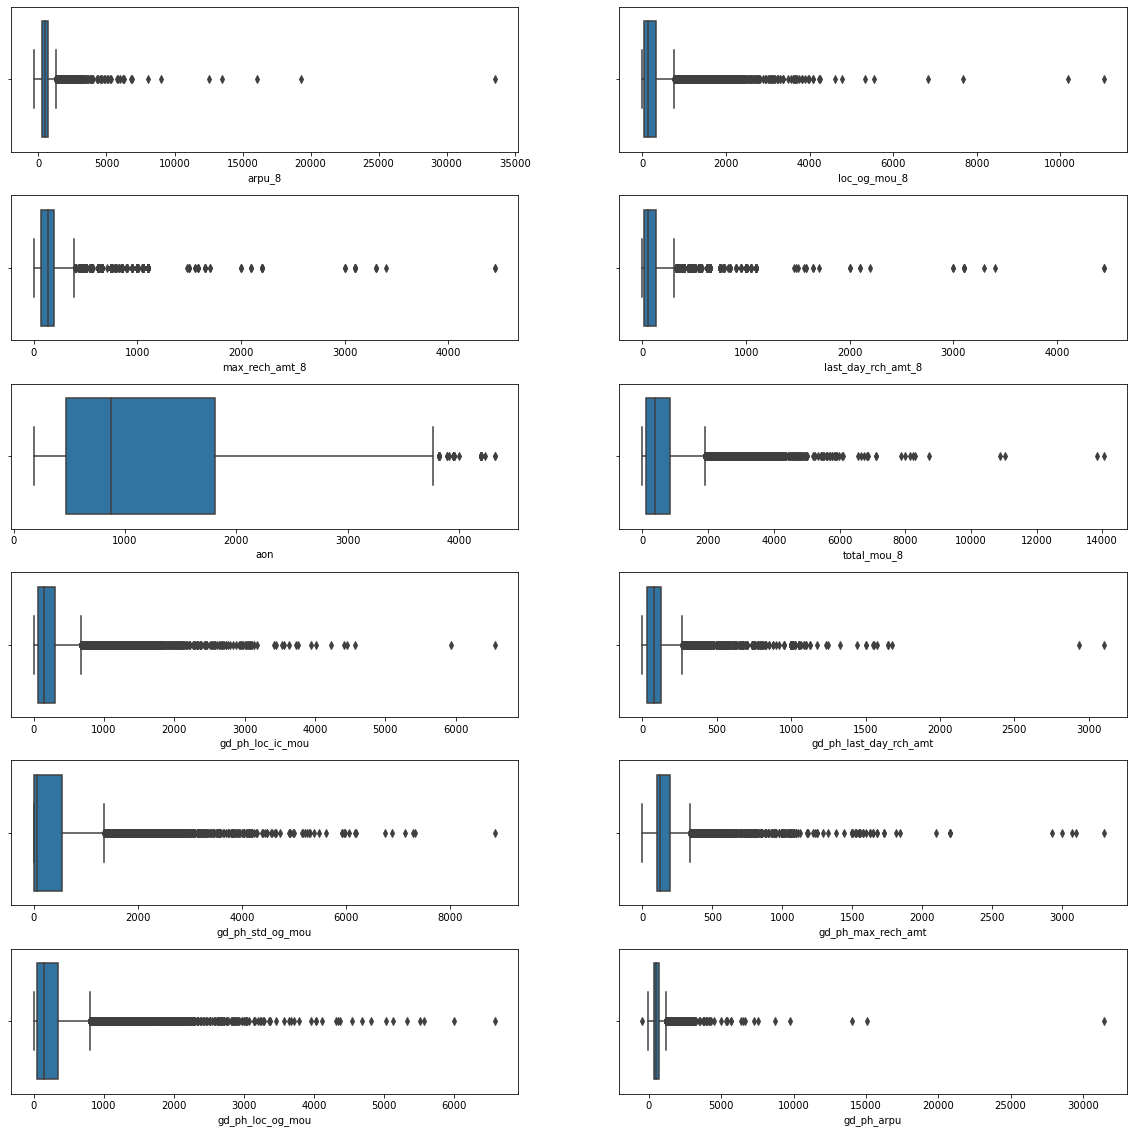

In [37]:
# Going through the output of describe we can filter out the features that needs a second look

# List of features to be analyzed
col_boxplot = ['arpu_8', 'loc_og_mou_8', 'max_rech_amt_8', 'last_day_rch_amt_8', 'aon', 'total_mou_8', 
               'gd_ph_loc_ic_mou', 'gd_ph_last_day_rch_amt', 'gd_ph_std_og_mou', 'gd_ph_max_rech_amt', 
              'gd_ph_loc_og_mou', 'gd_ph_arpu']

# Plot boxplots for each variable
fig, axes = plt.subplots(6, 2, figsize=(20, 20))
for index, col in enumerate(col_boxplot):
    i, j = divmod(index, 2)
    sns.boxplot(data_tel_hvc[col], ax=axes[i, j])
    
plt.subplots_adjust(hspace=0.3) 
plt.show()

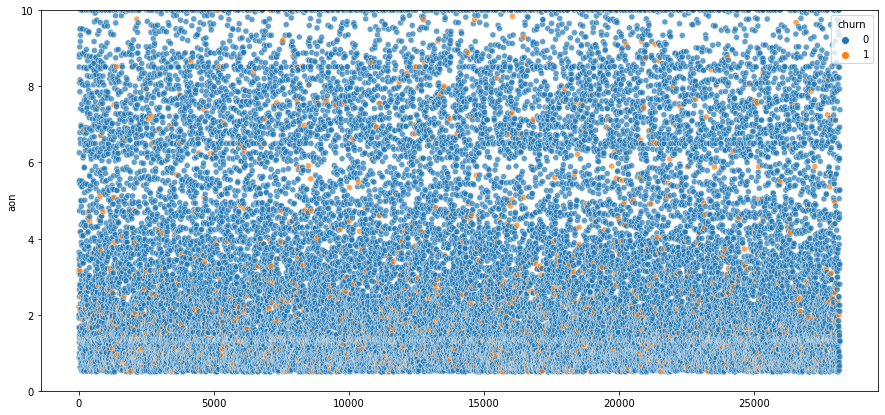

In [38]:
# Check churn based on tenure

plt.figure(figsize=(15,7))
sns.scatterplot(y=data_tel_hvc['aon']/365 , x=data_tel_hvc.index, hue=data_tel_hvc.churn, alpha=0.7)
plt.ylim(0,10)
plt.show()

- There is no clear pattern found here , but majority of thr churners are in less than 4 years

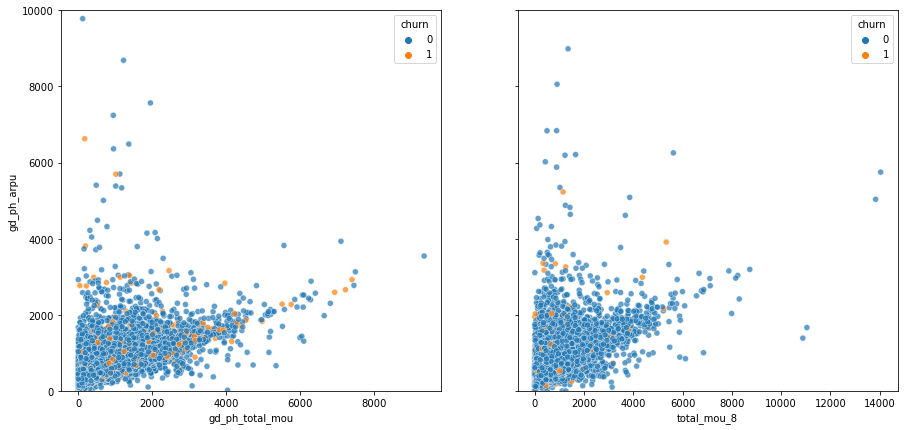

In [39]:
# checking how the VBC effects the revenue
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 7))
sns.scatterplot(y='gd_ph_arpu', x='gd_ph_total_mou', data=data_tel_hvc, ax=axes[0], hue='churn', alpha=0.7)
sns.scatterplot(y='arpu_8', x='total_mou_8', data=data_tel_hvc, ax=axes[1], hue='churn', alpha=0.7)


# Limiting the graph to more general upper bound
plt.ylim(0,10000)
plt.show()

- It is observed that MOU - Minutes of usage is dropped significantly for the churners in the action phase i.e 8th month, thus hitting the generated from them
- It is also intresting that MOU is between 0-2000 but still have the highest revenue says that users had other services too thuus boosting the revenue

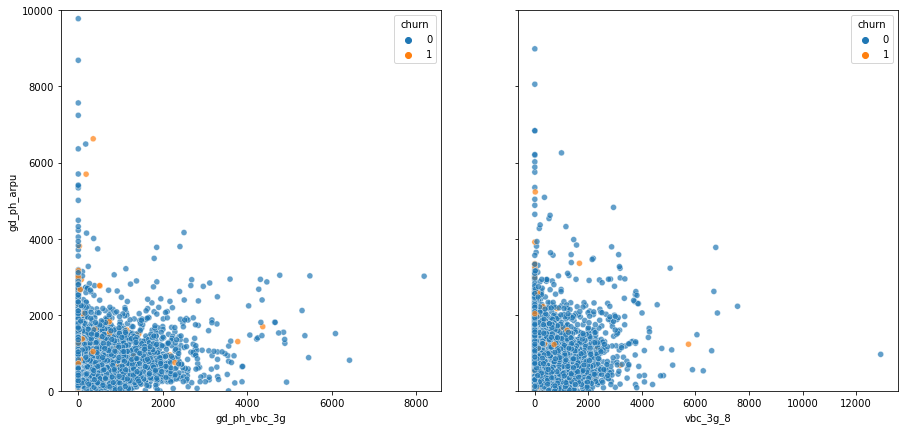

In [40]:
# Lets check how the total_mou effects the revenue
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 7))
sns.scatterplot(y='gd_ph_arpu', x='gd_ph_vbc_3g', data=data_tel_hvc, ax=axes[0], hue='churn', alpha=0.7)
sns.scatterplot(y='arpu_8', x='vbc_3g_8', data=data_tel_hvc, ax=axes[1], hue='churn', alpha=0.7)


# Limiting the graph to more general upper bound
plt.ylim(0,10000)
plt.show()

- It is abserved that most revenue earned and more churn rate is where there is less consumption side

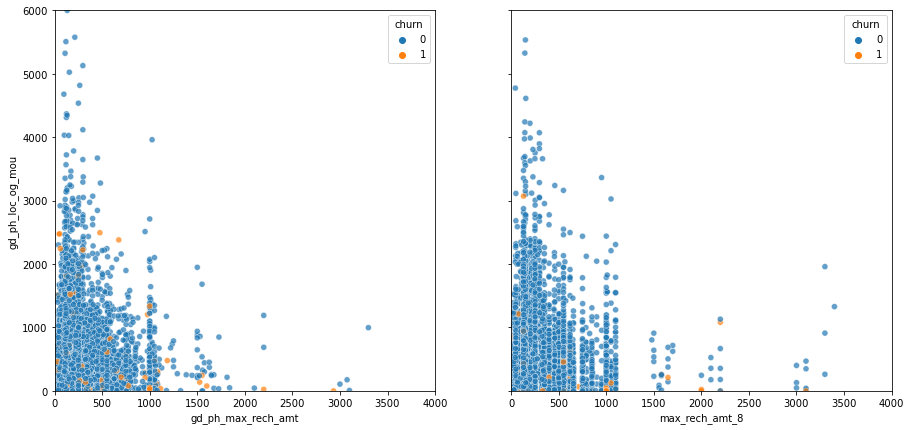

In [41]:
# Lets check the relation between recharge amount and local outgoing calls

fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 7))
sns.scatterplot(x='gd_ph_max_rech_amt', y='gd_ph_loc_og_mou', data=data_tel_hvc, ax=axes[0],
                hue='churn', alpha=0.7)
sns.scatterplot(x='max_rech_amt_8', y='loc_og_mou_8', data=data_tel_hvc, ax=axes[1], hue='churn', alpha=0.7)

# Limiting the graph to more general upper bound
axes[0].set_xlim(0,4000)
axes[1].set_xlim(0,4000)
plt.ylim(0,6000)

plt.show()

- It is observed that users who are recharging with the high amounts are using less local services

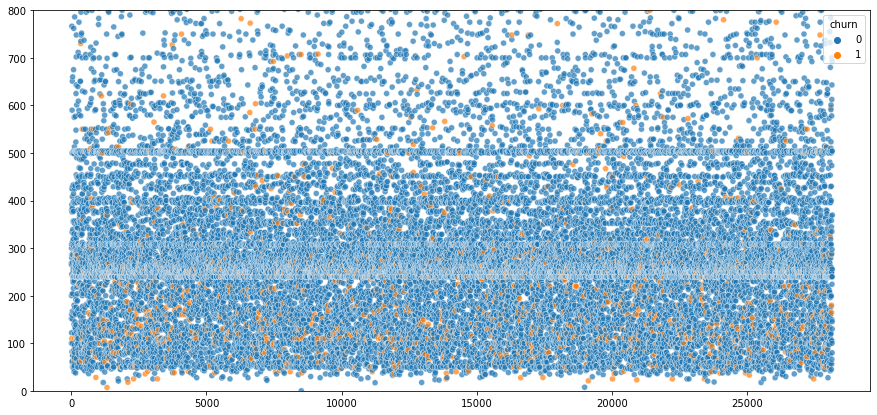

In [42]:
# Check the effect of max recharge amount on churn

plt.figure(figsize=(15,7))
sns.scatterplot(x=data_tel_hvc.index, y=data_tel_hvc['gd_ph_max_rech_amt'] + data_tel_hvc['max_rech_amt_8'],
                hue=data_tel_hvc['churn'], alpha=0.7)
plt.ylim(0,800)
plt.show()

- It is observed that users who had maximum recharge less than 250 churned more

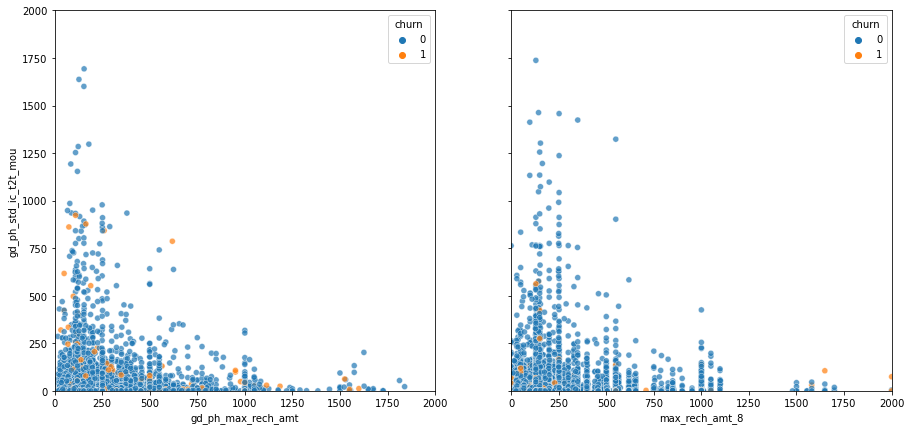

In [43]:
# Incoming from the same service provider vs the recharge amount

fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 7))
sns.scatterplot(x='gd_ph_max_rech_amt', y='gd_ph_std_ic_t2t_mou', data=data_tel_hvc, ax=axes[0],
                hue='churn', alpha=0.7)
sns.scatterplot(x='max_rech_amt_8', y='std_ic_t2t_mou_8', data=data_tel_hvc, ax=axes[1], hue='churn', alpha=0.7)

# Limiting the graph to more general upper bound
axes[0].set_xlim(0,2000)
axes[1].set_xlim(0,2000)
plt.ylim(0,2000)

plt.show()

- It is observed that users whi have max recharge amount on the higher end and still have low incoming call mou during good phase had churned out more

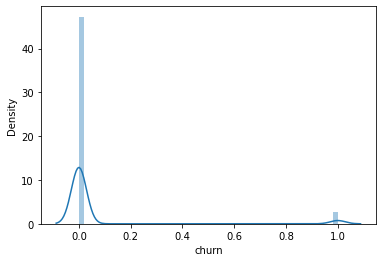

In [44]:
# Distribution of target variable

sns.distplot(data_tel_hvc['churn'])
plt.show()

- It is observed that though variable is not skewed it is highly imbalanced. number of non-churners in the dataset are around 91%
- Handling the imbalance using the SMOTE algorithm

### Data Preparation

In [45]:
# Capping the features with high outliers
col_upr_lmt = [('arpu_8', 7000), ('loc_og_mou_8', 4000), ('max_rech_amt_8', 1000 ), ('last_day_rch_amt_8', 1000 ), 
               ('aon', 3000), ('total_mou_8', 4000), ('gd_ph_loc_ic_mou', 3000), ('gd_ph_last_day_rch_amt', 1000 ), 
               ('gd_ph_std_og_mou', 4000), ('gd_ph_max_rech_amt', 1500), ('gd_ph_loc_og_mou', 3000), ('gd_ph_arpu', 7000)]

for col, value in col_upr_lmt:
    data_tel_hvc[col] = data_tel_hvc[col].apply(lambda x : x if x < value else value)

data_tel_hvc[col_boxplot].head()

,arpu_8,loc_og_mou_8,max_rech_amt_8,last_day_rch_amt_8,aon,total_mou_8,gd_ph_loc_ic_mou,gd_ph_last_day_rch_amt,gd_ph_std_og_mou,gd_ph_max_rech_amt,gd_ph_loc_og_mou,gd_ph_arpu
0,3171.480,255.79,1000,779,802,378.20,391.555,0.0,68.000,1185.0,478.035,1209.5150
1,137.362,63.04,30,10,315,171.56,52.630,25.0,136.870,122.0,333.135,435.4720
2,637.760,129.74,50,50,720,1068.53,106.505,25.0,848.990,50.0,95.565,556.1030
3,366.966,182.14,179,0,604,239.47,145.520,89.5,4.355,89.5,132.795,134.1235
4,409.230,0.00,455,455,1328,0.00,2.180,126.0,0.000,753.5,0.000,1669.9265


In [46]:
y = data_tel_hvc['churn']
X = data_tel_hvc.drop('churn', axis=1)

### Standardization

In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X[X.columns] = scaler.fit_transform(X[X.columns])

In [48]:
### Handling class imbalance

data_tel_hvc.churn.value_counts()

0    26625
1     1538
Name: churn, dtype: int64

In [49]:
# Using SMOTE method to handle class imbalance
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [50]:
y_res.value_counts()

1    26625
0    26625
Name: churn, dtype: int64

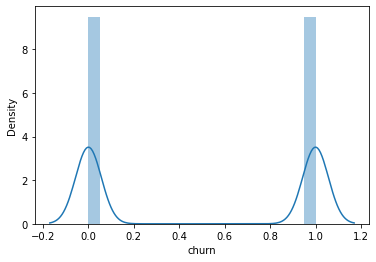

In [51]:
sns.distplot(y_res)
plt.show()

- Now the churn class varible is not imbalanced

In [52]:
# PCA

X.shape

(28163, 55)

In [53]:
from sklearn.decomposition import PCA

pca = PCA(n_components=25)
X_pca = pca.fit_transform(X_res)
X_pca.shape

(53250, 25)

## Model Building

1. Logistic Regression

- Using the original X and y values so that we can use RFE for feature selection instead of PCA, to find out the strong predictor of churn

In [54]:
# Splitting the data into train and test

from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X_res,y_res , train_size = 0.7 , test_size = 0.3 , random_state = 25)

In [55]:
# First Logistic regression model

import statsmodels.api as sm
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)),family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37275
Model:                            GLM   Df Residuals:                    37219
Model Family:                Binomial   Df Model:                           55
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15852.
Date:                Mon, 16 Jan 2023   Deviance:                       31704.
Time:                        11:50:20   Pearson chi2:                 2.59e+08
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -1.6129      0.025    -64.019      0.000      -1.662      -1.564
arpu_8                     0.1800      0.051      3.544      0.000       0.080       0.279
roam_ic_mou_8             -0.0024      0.017     -0.140      0.889      -0.036       0.031
roam_og_mou_8              0.1752      0.033      5.385      0.000       0.111       0.239
loc_og_t2c_mou_8           0.1610      0.025      6.372      0.000       0.112       0.211
loc_og_mou_8              -0.5171      0.096     -5.409      0.000      -0.705      -0.330
std_og_t2f_mou_8          -0.0964      0.040     -2.399      0.016      -0.175      -0.018
std_og_mou_8              -0.0596      0.127     -0.471      0.638      -0.307       0.188
isd_og_mou_8              -0.0684      0.072     -0.951      0.342      -0.209       0.073
spl_og_mou_8              -0.3055      0.040     -7.679      0.000      -0.384      -0.228
og_others_8                0.0725      0.017      4.214      0.000       0.039       0.106
loc_ic_mou_8              -1.7083      0.067    -25.364      0.000      -1.840      -1.576
std_ic_t2t_mou_8          -0.3094      0.062     -5.019      0.000      -0.430      -0.189
std_ic_t2f_mou_8          -0.1193      0.061     -1.957      0.050      -0.239       0.000
std_ic_mou_8              -0.4488      0.059     -7.571      0.000      -0.565      -0.333
spl_ic_mou_8              -0.3370      0.025    -13.302      0.000      -0.387      -0.287
isd_ic_mou_8              -0.1722      0.033     -5.222      0.000      -0.237      -0.108
ic_others_8                0.0642      0.039      1.661      0.097      -0.012       0.140
total_rech_num_8          -0.4405      0.035    -12.445      0.000      -0.510      -0.371
max_rech_amt_8             0.1720      0.026      6.725      0.000       0.122       0.222
last_day_rch_amt_8        -0.4628      0.022    -20.687      0.000      -0.507      -0.419
vol_2g_mb_8               -0.2522      0.033     -7.755      0.000      -0.316      -0.188
monthly_2g_8              -0.5843      0.032    -18.535      0.000      -0.646      -0.522
sachet_2g_8               -0.6044      0.033    -18.113      0.000      -0.670      -0.539
monthly_3g_8              -0.8178      0.041    -20.134      0.000      -0.897      -0.738
sachet_3g_8               -0.2727      0.036     -7.632      0.000      -0.343      -0.203
aon                       -0.3156      0.018    -17.911      0.000      -0.350      -0.281
total_mou_8               -0.5451      0.141     -3.870      0.000      -0.821      -0.269
gd_ph_roam_ic_mou          0.0738      0.021      3.471      0.001       0.032       0.116
gd_ph_arpu                 0.0084      0.042      0.200      0.842      -0.074       0.090
gd_ph_std_ic_t2f_mou      -0.0202      0.044     -0.464      0.643      -0.106  

In [56]:
# Using RFE for feature selection

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

logreg = LogisticRegression(solver = 'liblinear')

# Selecting 25 features using RFE
rfe = RFE(logreg, n_features_to_select = 25)
rfe = rfe.fit(X_train,y_train)

In [57]:
rfe_cols = X.columns[rfe.support_]
rfe_cols

Index(['arpu_8', 'roam_og_mou_8', 'loc_og_mou_8', 'loc_ic_mou_8',
       'std_ic_t2t_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8',
       'max_rech_amt_8', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'monthly_2g_8',
       'sachet_2g_8', 'monthly_3g_8', 'aon', 'total_mou_8',
       'gd_ph_roam_og_mou', 'gd_ph_total_rech_num', 'gd_ph_loc_ic_mou',
       'gd_ph_std_ic_t2t_mou', 'gd_ph_vol_2g_mb', 'gd_ph_monthly_2g',
       'gd_ph_ic_others', 'gd_ph_loc_og_mou', 'gd_ph_std_og_mou'],
      dtype='object')

In [58]:
# Building the logistic regression model using the RFE selected features
X_train_sm = sm.add_constant(X_train[rfe_cols])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37275
Model:                            GLM   Df Residuals:                    37249
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16039.
Date:                Mon, 16 Jan 2023   Deviance:                       32077.
Time:                        11:50:47   Pearson chi2:                 8.87e+08
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.5625      0.025    -63.607      0.000      -1.611      -1.514
arpu_8                   0.1991      0.032      6.318      0.000       0.137       0.261
roam_og_mou_8            0.2018      0.019     10.556      0.000       0.164       0.239
loc_og_mou_8            -0.4709      0.056     -8.428      0.000      -0.580      -0.361
loc_ic_mou_8            -1.7729      0.067    -26.508      0.000      -1.904      -1.642
std_ic_t2t_mou_8        -0.3524      0.058     -6.085      0.000      -0.466      -0.239
std_ic_mou_8            -0.3956      0.042     -9.444      0.000      -0.478      -0.314
spl_ic_mou_8            -0.3612      0.025    -14.364      0.000      -0.411      -0.312
total_rech_num_8        -0.5510      0.033    -16.654      0.000      -0.616      -0.486
max_rech_amt_8           0.1982      0.023      8.485      0.000       0.152       0.244
last_day_rch_amt_8      -0.4781      0.022    -21.806      0.000      -0.521      -0.435
vol_2g_mb_8             -0.2708      0.033     -8.327      0.000      -0.335      -0.207
monthly_2g_8            -0.5853      0.030    -19.189      0.000      -0.645      -0.525
sachet_2g_8             -0.5785      0.027    -21.810      0.000      -0.630      -0.526
monthly_3g_8            -0.7374      0.031    -23.655      0.000      -0.798      -0.676
aon                     -0.3150      0.017    -18.304      0.000      -0.349      -0.281
total_mou_8             -0.6119      0.035    -17.248      0.000      -0.681      -0.542
gd_ph_roam_og_mou        0.2093      0.017     12.366      0.000       0.176       0.242
gd_ph_total_rech_num     0.2561      0.025     10.190      0.000       0.207       0.305
gd_ph_loc_ic_mou         0.6989      0.045     15.466      0.000       0.610       0.787
gd_ph_std_ic_t2t_mou     0.2689      0.027      9.986      0.000       0.216       0.322
gd_ph_vol_2g_mb          0.2074      0.022      9.380      0.000       0.164       0.251
gd_ph_monthly_2g        -0.2134      0.024     -9.081      0.000      -0.259      -0.167
gd_ph_ic_others         -0.2094      0.055     -3.824      0.000      -0.317      -0.102
gd_ph_loc_og_mou         0.3110      0.037      8.467      0.000       0.239       0.383
gd_ph_std_og_mou         0.4670      0.024     19.824      0.000       0.421       0.513
========================================================================================
"""

In [59]:
# Prediction on train data

y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head(10)

,Churn,Churn_Prob,predicted
0,1,0.919473,1
1,0,0.720128,1
2,1,0.785315,1
3,0,0.034398,0
4,1,0.709161,1
5,1,0.815767,1
6,0,0.011436,0
7,1,0.339384,0
8,0,0.015111,0
9,1,0.037568,0


In [60]:
# Confusion matrix
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_train_pred_final.Churn , y_train_pred_final.predicted)
print(confusion_matrix)

[[14777  3809]
 [ 2937 15752]]


In [61]:
# Accuracy
print(f'Accuracy : {metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)}')

Accuracy : 0.8190207914151576


In [62]:
# Checking VI values of the feature variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_cols].values, i) for i in range(X_train[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
2,loc_og_mou_8,4.70
0,arpu_8,4.24
15,total_mou_8,4.16
3,loc_ic_mou_8,4.14
18,gd_ph_loc_ic_mou,3.71
23,gd_ph_loc_og_mou,3.57
7,total_rech_num_8,3.13
8,max_rech_amt_8,2.61
24,gd_ph_std_og_mou,2.36
17,gd_ph_total_rech_num,2.28


- VIF value of 'loc_og_mou_8' is very high so will drop this feature

In [63]:
rfe_cols = rfe_cols.drop('loc_og_mou_8',1)

In [64]:
# Building new model again after dropping loc_og_mou_8 feature
X_train_sm = sm.add_constant(X_train[rfe_cols])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37275
Model:                            GLM   Df Residuals:                    37250
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16078.
Date:                Mon, 16 Jan 2023   Deviance:                       32156.
Time:                        11:50:50   Pearson chi2:                 9.81e+08
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.5405      0.024    -63.340      0.000      -1.588      -1.493
arpu_8                   0.1792      0.031      5.778      0.000       0.118       0.240
roam_og_mou_8            0.2227      0.019     11.772      0.000       0.186       0.260
loc_ic_mou_8            -1.9895      0.062    -31.866      0.000      -2.112      -1.867
std_ic_t2t_mou_8        -0.3338      0.058     -5.788      0.000      -0.447      -0.221
std_ic_mou_8            -0.3933      0.042     -9.350      0.000      -0.476      -0.311
spl_ic_mou_8            -0.3597      0.025    -14.325      0.000      -0.409      -0.310
total_rech_num_8        -0.5546      0.033    -16.789      0.000      -0.619      -0.490
max_rech_amt_8           0.1957      0.023      8.458      0.000       0.150       0.241
last_day_rch_amt_8      -0.4737      0.022    -21.761      0.000      -0.516      -0.431
vol_2g_mb_8             -0.2665      0.032     -8.204      0.000      -0.330      -0.203
monthly_2g_8            -0.5858      0.030    -19.246      0.000      -0.645      -0.526
sachet_2g_8             -0.5769      0.027    -21.766      0.000      -0.629      -0.525
monthly_3g_8            -0.7286      0.031    -23.491      0.000      -0.789      -0.668
aon                     -0.3209      0.017    -18.764      0.000      -0.354      -0.287
total_mou_8             -0.6925      0.035    -20.025      0.000      -0.760      -0.625
gd_ph_roam_og_mou        0.2041      0.017     12.254      0.000       0.171       0.237
gd_ph_total_rech_num     0.2661      0.025     10.578      0.000       0.217       0.315
gd_ph_loc_ic_mou         0.7955      0.044     18.208      0.000       0.710       0.881
gd_ph_std_ic_t2t_mou     0.2612      0.027      9.760      0.000       0.209       0.314
gd_ph_vol_2g_mb          0.2080      0.022      9.404      0.000       0.165       0.251
gd_ph_monthly_2g        -0.2132      0.023     -9.088      0.000      -0.259      -0.167
gd_ph_ic_others         -0.2131      0.055     -3.881      0.000      -0.321      -0.105
gd_ph_loc_og_mou         0.0861      0.024      3.554      0.000       0.039       0.134
gd_ph_std_og_mou         0.5173      0.023     22.259      0.000       0.472       0.563
========================================================================================
"""

In [65]:
# Predict on train data

y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,1,0.917667,1
1,0,0.719017,1
2,1,0.780793,1
3,0,0.040710,0
4,1,0.711189,1


In [66]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

print()

# The overall accuracy.
print(f'Accuracy : {metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)}')

[[14834  3752]
 [ 3003 15686]]

Accuracy : 0.8187793427230047


In [67]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_cols].values, i) for i in range(X_train[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,arpu_8,4.23
14,total_mou_8,3.76
2,loc_ic_mou_8,3.68
17,gd_ph_loc_ic_mou,3.54
6,total_rech_num_8,3.13
7,max_rech_amt_8,2.61
16,gd_ph_total_rech_num,2.27
3,std_ic_t2t_mou_8,2.26
23,gd_ph_std_og_mou,2.24
8,last_day_rch_amt_8,1.99


- VIF value of 'loc_ic_mou_8' is very high so will drop this feature

In [68]:
rfe_cols = rfe_cols.drop('loc_ic_mou_8',1)

In [69]:
# Building new model again after dropping loc_og_mou_8 feature
X_train_sm = sm.add_constant(X_train[rfe_cols])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37275
Model:                            GLM   Df Residuals:                    37251
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16780.
Date:                Mon, 16 Jan 2023   Deviance:                       33561.
Time:                        11:50:53   Pearson chi2:                 4.64e+09
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.2633      0.021    -61.600      0.000      -1.303      -1.223
arpu_8                   0.0726      0.032      2.291      0.022       0.011       0.135
roam_og_mou_8            0.3710      0.020     18.971      0.000       0.333       0.409
std_ic_t2t_mou_8        -0.3608      0.059     -6.156      0.000      -0.476      -0.246
std_ic_mou_8            -0.5154      0.043    -11.893      0.000      -0.600      -0.430
spl_ic_mou_8            -0.3831      0.025    -15.061      0.000      -0.433      -0.333
total_rech_num_8        -0.7014      0.033    -21.088      0.000      -0.767      -0.636
max_rech_amt_8           0.1829      0.022      8.152      0.000       0.139       0.227
last_day_rch_amt_8      -0.4740      0.022    -21.879      0.000      -0.516      -0.432
vol_2g_mb_8             -0.2880      0.032     -8.877      0.000      -0.352      -0.224
monthly_2g_8            -0.6005      0.030    -20.123      0.000      -0.659      -0.542
sachet_2g_8             -0.5930      0.026    -22.479      0.000      -0.645      -0.541
monthly_3g_8            -0.7186      0.030    -23.615      0.000      -0.778      -0.659
aon                     -0.3621      0.016    -22.086      0.000      -0.394      -0.330
total_mou_8             -0.9328      0.035    -26.364      0.000      -1.002      -0.863
gd_ph_roam_og_mou        0.1761      0.017     10.606      0.000       0.144       0.209
gd_ph_total_rech_num     0.3779      0.025     15.254      0.000       0.329       0.426
gd_ph_loc_ic_mou        -0.2591      0.023    -11.323      0.000      -0.304      -0.214
gd_ph_std_ic_t2t_mou     0.3238      0.026     12.435      0.000       0.273       0.375
gd_ph_vol_2g_mb          0.2271      0.022     10.469      0.000       0.185       0.270
gd_ph_monthly_2g        -0.2100      0.023     -9.285      0.000      -0.254      -0.166
gd_ph_ic_others         -0.1704      0.049     -3.485      0.000      -0.266      -0.075
gd_ph_loc_og_mou         0.0887      0.023      3.900      0.000       0.044       0.133
gd_ph_std_og_mou         0.7092      0.023     30.230      0.000       0.663       0.755
========================================================================================
"""

In [70]:
# Predict on train data

y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,1,0.915309,1
1,0,0.712270,1
2,1,0.717724,1
3,0,0.139694,0
4,1,0.745086,1


In [71]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

print()

# The overall accuracy.
print(f'Accuracy : {metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)}')

[[14813  3773]
 [ 3448 15241]]

Accuracy : 0.8062776659959758


In [72]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_cols].values, i) for i in range(X_train[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,arpu_8,4.22
13,total_mou_8,3.68
5,total_rech_num_8,3.11
6,max_rech_amt_8,2.61
2,std_ic_t2t_mou_8,2.26
15,gd_ph_total_rech_num,2.26
22,gd_ph_std_og_mou,2.19
7,last_day_rch_amt_8,1.99
8,vol_2g_mb_8,1.86
1,roam_og_mou_8,1.84


In [73]:
rfe_cols = rfe_cols.drop('total_mou_8',1)

In [74]:
# Building new model again after dropping loc_og_mou_8 feature
X_train_sm = sm.add_constant(X_train[rfe_cols])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37275
Model:                            GLM   Df Residuals:                    37252
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17149.
Date:                Mon, 16 Jan 2023   Deviance:                       34297.
Time:                        11:50:56   Pearson chi2:                 2.03e+11
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.2628      0.021    -61.088      0.000      -1.303      -1.222
arpu_8                  -0.4521      0.030    -14.926      0.000      -0.511      -0.393
roam_og_mou_8            0.4390      0.020     21.849      0.000       0.400       0.478
std_ic_t2t_mou_8        -0.4643      0.061     -7.652      0.000      -0.583      -0.345
std_ic_mou_8            -0.5552      0.044    -12.705      0.000      -0.641      -0.470
spl_ic_mou_8            -0.3878      0.025    -15.244      0.000      -0.438      -0.338
total_rech_num_8        -0.9658      0.034    -28.749      0.000      -1.032      -0.900
max_rech_amt_8           0.2729      0.022     12.265      0.000       0.229       0.316
last_day_rch_amt_8      -0.5335      0.022    -24.465      0.000      -0.576      -0.491
vol_2g_mb_8             -0.2551      0.032     -7.885      0.000      -0.319      -0.192
monthly_2g_8            -0.5671      0.030    -18.864      0.000      -0.626      -0.508
sachet_2g_8             -0.5717      0.027    -21.354      0.000      -0.624      -0.519
monthly_3g_8            -0.6071      0.030    -19.986      0.000      -0.667      -0.548
aon                     -0.3550      0.016    -21.836      0.000      -0.387      -0.323
gd_ph_roam_og_mou        0.1415      0.016      8.591      0.000       0.109       0.174
gd_ph_total_rech_num     0.5776      0.024     23.613      0.000       0.530       0.626
gd_ph_loc_ic_mou        -0.2418      0.022    -10.796      0.000      -0.286      -0.198
gd_ph_std_ic_t2t_mou     0.3822      0.027     14.139      0.000       0.329       0.435
gd_ph_vol_2g_mb          0.2045      0.022      9.419      0.000       0.162       0.247
gd_ph_monthly_2g        -0.2201      0.023     -9.717      0.000      -0.265      -0.176
gd_ph_ic_others         -0.1480      0.046     -3.192      0.001      -0.239      -0.057
gd_ph_loc_og_mou        -0.0963      0.020     -4.723      0.000      -0.136      -0.056
gd_ph_std_og_mou         0.3205      0.016     19.558      0.000       0.288       0.353
========================================================================================
"""

In [75]:
# Predict on train data

y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,1,0.914978,1
1,0,0.736075,1
2,1,0.713043,1
3,0,0.173533,0
4,1,0.740506,1


In [76]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

print()

# The overall accuracy.
print(f'Accuracy : {metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)}')

[[14531  4055]
 [ 3391 15298]]

Accuracy : 0.800241448692153


In [77]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_cols].values, i) for i in range(X_train[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,arpu_8,3.08
5,total_rech_num_8,2.72
6,max_rech_amt_8,2.58
2,std_ic_t2t_mou_8,2.26
14,gd_ph_total_rech_num,2.05
7,last_day_rch_amt_8,1.98
8,vol_2g_mb_8,1.86
17,gd_ph_vol_2g_mb,1.84
1,roam_og_mou_8,1.83
18,gd_ph_monthly_2g,1.81


- Now the VIF looks good

In [78]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [79]:
# Calculating the sensitivity

TP/float(TP+FN)


0.8185563700572529

In [80]:
# Calculating the specificity

TN/float(TN+FP)

0.7818250295921662

In [81]:
# Calculating false positive rate 

FP/float(TN+FP)

0.21817497040783385

In [82]:
# Calculating positive predictive value
TP/float(TP+FP)

0.7904717614840077

In [83]:
# Negative Predictive value
TN/float(TN+FN)

0.8107912063385783

### Plotting ROC

In [84]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False)
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

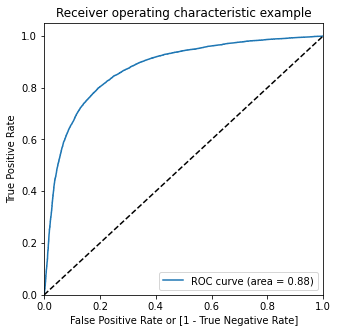

In [85]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

### Optimal cutoff point

In [86]:
# creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.914978,1,1,1,1,1,1,1,1,1,1,1
1,0,0.736075,1,1,1,1,1,1,1,1,1,0,0
2,1,0.713043,1,1,1,1,1,1,1,1,1,0,0
3,0,0.173533,0,1,1,0,0,0,0,0,0,0,0
4,1,0.740506,1,1,1,1,1,1,1,1,1,0,0


In [87]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5, 0.5, 0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.501382     0.000000     1.000000
0.1          0.1  0.631522     0.282740     0.978383
0.2          0.2  0.703877     0.456526     0.949864
0.3          0.3  0.755654     0.587378     0.923003
0.4          0.4  0.785755     0.693318     0.877682
0.5          0.5  0.800241     0.781825     0.818556
0.6          0.6  0.798632     0.858549     0.739044
0.7          0.7  0.771804     0.915743     0.628659
0.8          0.8  0.709725     0.957710     0.463107
0.9          0.9  0.589618     0.984720     0.196693


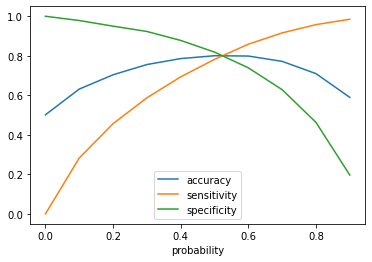

In [88]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

- The optimal point is 0.5

In [89]:
X_test = X_test[rfe_cols]
X_test_sm = sm.add_constant(X_test)

# Predict on test data

y_test_pred = res.predict(X_test_sm)
y_test_pred_final = pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':y_test_pred})
y_test_pred_final['predicted'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_test_pred_final.head()

,Churn,Churn_Prob,predicted
29054,1,0.714169,1
8652,0,0.559894,1
34178,1,0.803179,1
12526,1,0.883614,1
27012,0,0.059335,0


In [90]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_test_pred_final.Churn, y_test_pred_final.predicted )
print(confusion)

print()

# The overall accuracy.
print(f'Accuracy : {metrics.accuracy_score(y_test_pred_final.Churn, y_test_pred_final.predicted)}')

[[6309 1730]
 [1450 6486]]

Accuracy : 0.8009389671361502


In [91]:
# Top 10 predictors
abs(res.params).sort_values(ascending=False)[0:11]

const                   1.262817
total_rech_num_8        0.965809
monthly_3g_8            0.607085
gd_ph_total_rech_num    0.577569
sachet_2g_8             0.571728
monthly_2g_8            0.567149
std_ic_mou_8            0.555204
last_day_rch_amt_8      0.533535
std_ic_t2t_mou_8        0.464303
arpu_8                  0.452114
roam_og_mou_8           0.438985
dtype: float64

- when using Logistic Regression, getting an accuracy of 80% on train data and 80% on test data.
- It is clear than most of the critical features are from 8th months i.e, action phase which is inline with the business understanding that action phase needs more attention

### Decision Tree

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_res, train_size=0.7, random_state=42)

In [93]:
from sklearn.tree import DecisionTreeClassifier

# Initial classifier
intial_dt = DecisionTreeClassifier(random_state=42, max_depth=10)
intial_dt.fit(X_train, y_train)

# Train Accuracy
y_train_pred = intial_dt.predict(X_train)
print(f'Train accuracy : {metrics.accuracy_score(y_train, y_train_pred)}')

y_test_pred = intial_dt.predict(X_test)

# Print the report on test data
print(metrics.classification_report(y_test, y_test_pred))

Train accuracy : 0.8897920858484238
              precision    recall  f1-score   support

           0       0.86      0.83      0.85      7984
           1       0.84      0.87      0.85      7991

    accuracy                           0.85     15975
   macro avg       0.85      0.85      0.85     15975
weighted avg       0.85      0.85      0.85     15975



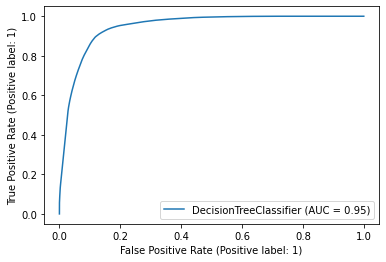

In [94]:
# Plot ROC curve
from sklearn.metrics import plot_roc_curve
plot_roc_curve(intial_dt, X_train, y_train, drop_intermediate=False)
plt.show()

### Hyperparameter tuning

In [95]:
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier(random_state=42)

# Define parameters
params = {
    "max_depth": [2, 3, 5, 10, 20, 30, 40, 50, 100],
    "min_samples_leaf": [5, 10, 20, 50, 100, 250, 500, 800, 1000],
    "min_samples_leaf" : [1, 5, 10, 25, 50, 100]
}

grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

# Perform gridsearch
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 54 candidates, totalling 216 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20, 30, 40, 50, 100],
                         'min_samples_leaf': [1, 5, 10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [96]:
grid_search.best_score_

0.8748491554768095

In [97]:
# Best estimator
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=20, random_state=42)

In [98]:
y_train_pred = dt_best.predict(X_train)
y_test_pred = dt_best.predict(X_test)

# Print the report
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.86      0.89      7984
           1       0.87      0.92      0.89      7991

    accuracy                           0.89     15975
   macro avg       0.89      0.89      0.89     15975
weighted avg       0.89      0.89      0.89     15975



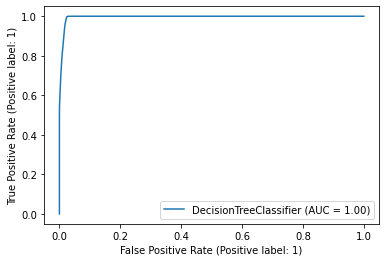

In [99]:
# ROC
plot_roc_curve(dt_best, X_train, y_train)
plt.show()

- With descision tree there is 89% accuracy on test data 

### Random Forest

Train accuracy : 0.8897920858484238
              precision    recall  f1-score   support

           0       0.87      0.88      0.88      7984
           1       0.88      0.87      0.88      7991

    accuracy                           0.88     15975
   macro avg       0.88      0.88      0.88     15975
weighted avg       0.88      0.88      0.88     15975



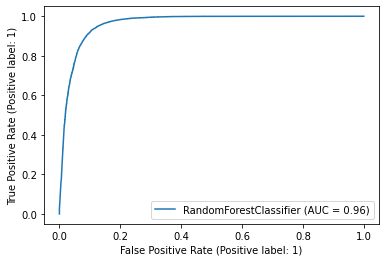

In [100]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=15, max_depth=10, max_features=5, random_state=25, oob_score=True)
rf.fit(X_train, y_train)

y_train_pred = rf.predict(X_train)

# Train Accuracy
y_train_pred = intial_dt.predict(X_train)
print(f'Train accuracy : {metrics.accuracy_score(y_train, y_train_pred)}')

y_test_pred = rf.predict(X_test)

# Print the report
print(metrics.classification_report(y_test, y_test_pred))

# Plotting ROC
plot_roc_curve(rf, X_train, y_train)
plt.show()

### Hyperparaameter tuning

In [101]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# Define parameters
params = {
    'max_depth': [2, 3, 5, 10, 20, 30],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'n_estimators': [10, 25, 50, 100]
}

grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20, 30],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [102]:
grid_search.best_score_

0.9256874449656739

In [103]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

In [104]:
y_train_pred = rf_best.predict(X_train)
y_test_pred = rf_best.predict(X_test)

# Print the report
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      7984
           1       0.93      0.95      0.94      7991

    accuracy                           0.94     15975
   macro avg       0.94      0.94      0.94     15975
weighted avg       0.94      0.94      0.94     15975



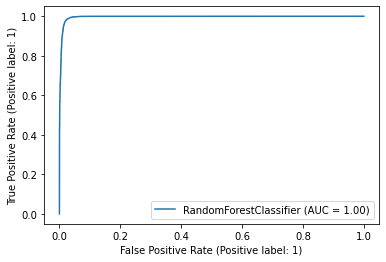

In [105]:
plot_roc_curve(rf_best, X_train, y_train)
plt.show()

- With Random Forest we get an accuracy of 94% on test data

### 4. Adaboost

In [106]:
from sklearn.ensemble import AdaBoostClassifier

In [107]:
# Create a shallow tree as weak learner
shallow_tree = DecisionTreeClassifier(max_depth=2, random_state = 100)

# Fit the shallow decision tree 
shallow_tree.fit(X_train, y_train)

# Test error
y_pred = shallow_tree.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
score

0.7199374021909233

In [108]:
# Adaboost with shallow tree as base estimator

# Define the number of trees to be used or estimators
estimators = list(range(1, 150, 10))

# Loop through the estimators
adaboost_scores = []
for num_est in estimators:
    adaboost = AdaBoostClassifier(base_estimator=shallow_tree, n_estimators = num_est, random_state=25)
    
    adaboost.fit(X_train, y_train)
    y_pred = adaboost.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    adaboost_scores.append(score)

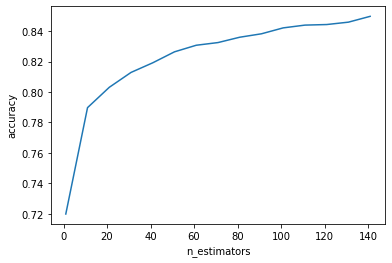

In [109]:
# Plot the scores corrosponding to number of estimators to find the best possible number of estimator
plt.plot(estimators, adaboost_scores)
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.show()

In [110]:
adaboost_best = AdaBoostClassifier(base_estimator=shallow_tree, n_estimators = 200, random_state=25)
adaboost_best.fit(X_train, y_train)
y_pred = adaboost_best.predict(X_test)

print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      7984
           1       0.93      0.95      0.94      7991

    accuracy                           0.94     15975
   macro avg       0.94      0.94      0.94     15975
weighted avg       0.94      0.94      0.94     15975



### Conclusion

- Given our bussines probelm, to retain their customers, we need higher recall. As giving an offer to an user not going to churn will cost less as compared to loosing a customer and bring new customer, we need to have high rate of correctly identifying the true positives, hence recall.

- When we compare the models trained we can see the tuned random forest and ada boost are performing the best, which is highest accuracy along with highest recall i.e. 94% and 94% respectively. So, we will go with random forest instead of adaboost as that is comparetively simpler model.


In [111]:
final_model = RandomForestClassifier(max_depth=30, min_samples_leaf=5, n_jobs=-1,
                       random_state=25)

In [112]:
y_train_pred = rf_best.predict(X_train)
y_test_pred = rf_best.predict(X_test)



# Print the report
print("Report on train data")
print(metrics.classification_report(y_train, y_train_pred))

print("Report on test data")
print(metrics.classification_report(y_test, y_test_pred))

Report on train data
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     18641
           1       0.97      0.99      0.98     18634

    accuracy                           0.98     37275
   macro avg       0.98      0.98      0.98     37275
weighted avg       0.98      0.98      0.98     37275

Report on test data
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      7984
           1       0.93      0.95      0.94      7991

    accuracy                           0.94     15975
   macro avg       0.94      0.94      0.94     15975
weighted avg       0.94      0.94      0.94     15975



### Strategies to Manage customer churn

- Top 10 Predictors are:
    - total_reach_num_8
    - monthly_3g_8
    - gd_ph_total_rech_num
    - sachet_2g_8
    - monthly_2g_8
    - std_ic_mou_8
    - last_day_rch_amt_8
    - std_ic_t2t_mou_8
    - arpu_8
    - raom_og_mou_8


- We can see most of the top predictors are from the action phase, as the drop in engagement is prominent in that phase
- Some of the factors we noticed while performing EDA which can be clubed with these inshigts are:

1. Users whose maximum recharge amount is less than 200 even in the good pahse, should have a tag and re-evaluated time to time as they are more likely to churn
2. Users that have been with the network less than 4 years, should be monitored time to time, as from data we can see that users who have been associated with the network for less than 4 years tend to churn more
3. MOU is one of the major factors, but data especially VBC if the user is not using a data pack if another factor to look out
